In [ ]:
#pip install scikit-learn

In [ ]:
#pip install pandas

In [ ]:
#pip install tensorflow

In [ ]:
#pip install matplotlib

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
model_nn = pd.read_csv('Cleaned_2Columbia_Return.csv')

In [7]:
model_nn.head(5)

,ReturnYear,TotalAge,ReturnCount
0,1985,2,1461
1,1985,3,151004
2,1985,4,13875
3,1985,5,0
4,1985,6,0


In [8]:
# Define features and labels
features = model_nn[['ReturnYear', 'TotalAge']]   # X
labels = model_nn['ReturnCount']                  # y

In [9]:
# Create a new DataFrame if you need it (optional)
model_df = pd.DataFrame(features, columns=['ReturnYear', 'TotalAge'])
model_df['ReturnCount'] = labels

In [10]:
model_df

,ReturnYear,TotalAge,ReturnCount
0,1985,2,1461
1,1985,3,151004
2,1985,4,13875
3,1985,5,0
4,1985,6,0
...,...,...,...
195,2024,2,11687
196,2024,3,715817
197,2024,4,28205
198,2024,5,200


In [11]:
# 2. SPLIT THE DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    model_df[['ReturnYear', 'TotalAge']],
    model_df['ReturnCount'],
    test_size=0.2,
    random_state=42
)

In [12]:
# 3. BUILD & TRAIN THE MODEL (train only once)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define a simple neural network
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Hidden layer with 10 neurons
    Dense(1, activation='sigmoid')                   # Output layer for binary classification
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model ONCE and store the training history
history = model.fit(
    X_train,
    y_train,
    epochs=5, #epochs means number of times the model will see the entire dataset
    batch_size=1, #batch size means number of samples processed before the model is updated
    validation_split=0.2, #validation split means percentage of training data to be used for validation
    verbose=1 #verbose=1 means to print the training progress
)

Epoch 1/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1158 - loss: 4463747.0000 - val_accuracy: 0.0000e+00 - val_loss: -10384417.0000
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -9679992.0000 - val_accuracy: 0.0000e+00 - val_loss: -30632720.0000
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -12882332.0000 - val_accuracy: 0.0000e+00 - val_loss: -52841640.0000
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: -30918542.0000 - val_accuracy: 0.0000e+00 - val_loss: -76981984.0000
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: -49528364.0000 - val_accuracy: 0.0000e+00 - val_loss: -103539224.0000


In [15]:
# 4. EVALUATE THE MODEL
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.2f} (on unseen test data)")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.0000e+00 - loss: -44507288.0000 

✅ Test Accuracy: 0.00 (on unseen test data)


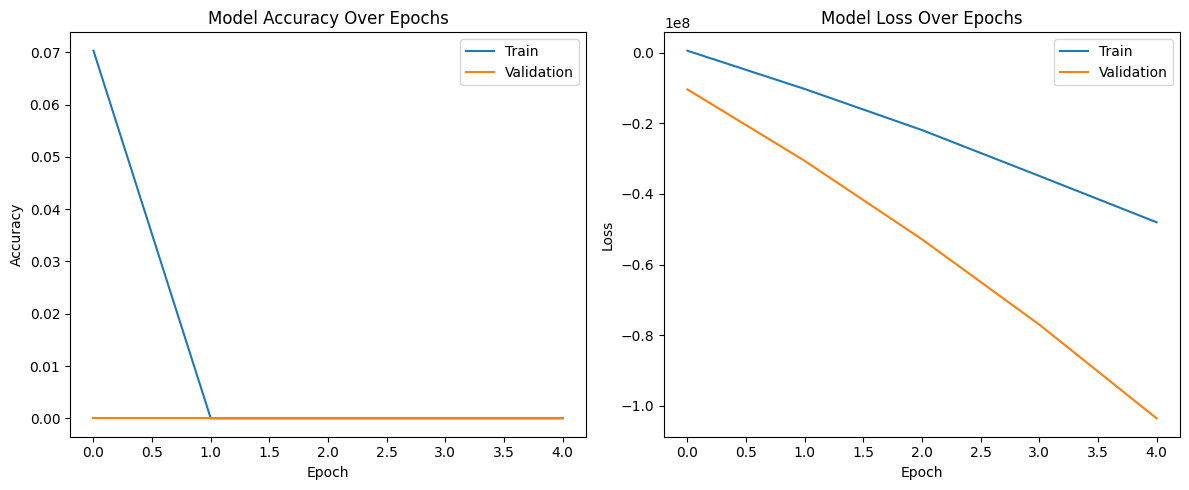

In [16]:
# 5. PLOT TRAINING METRICS
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()